In [182]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

/tmp/ipykernel_1019849/3843215653.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axs = plt.subplots(2, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))


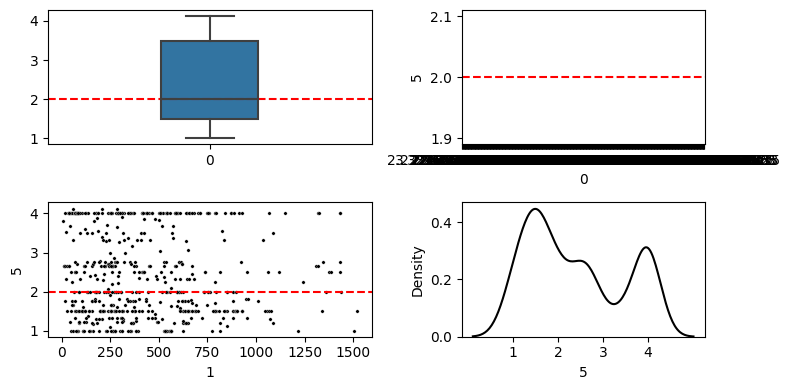

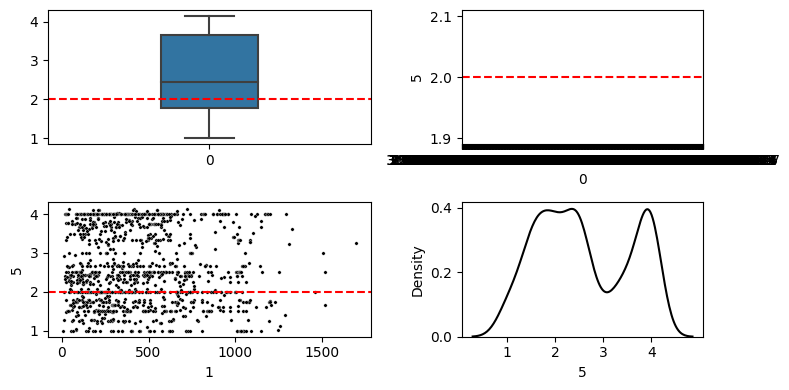

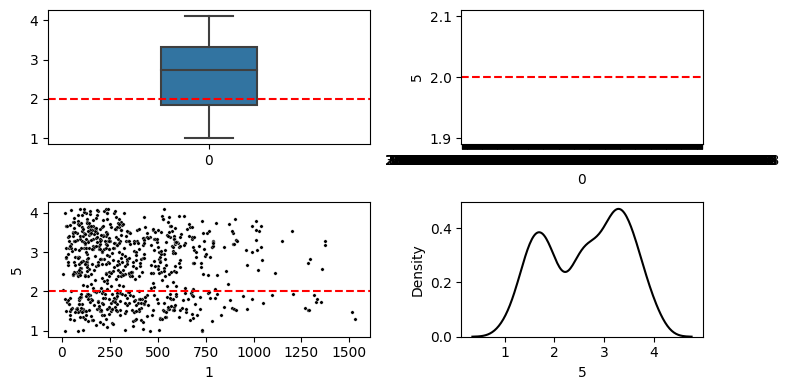

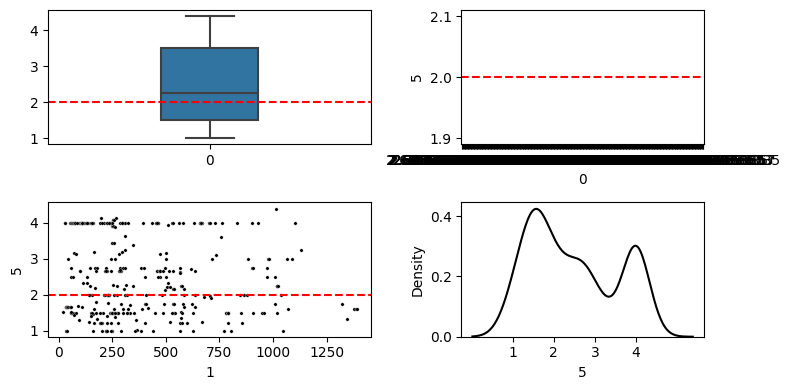

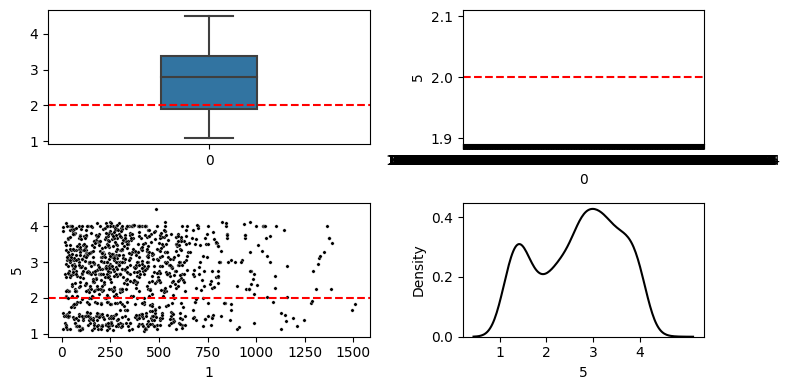

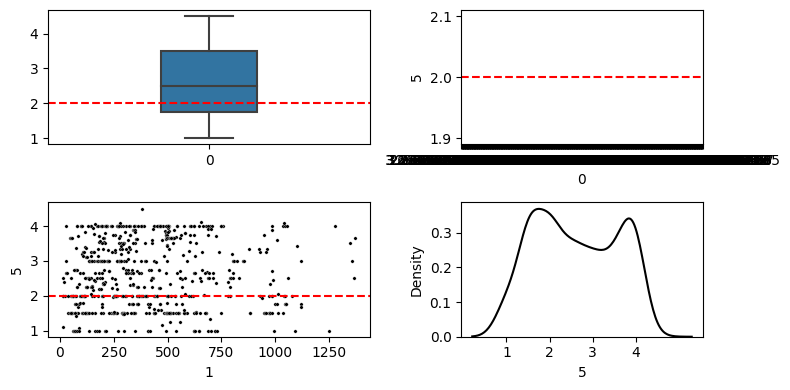

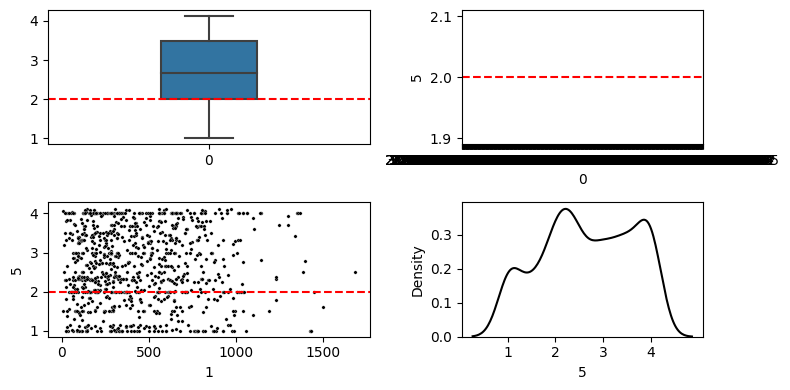

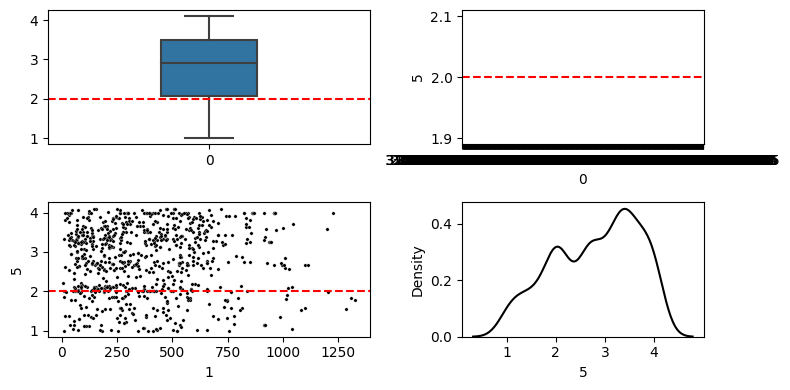

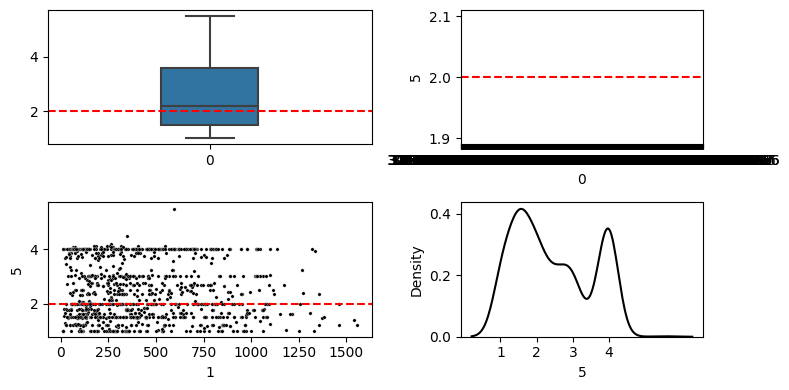

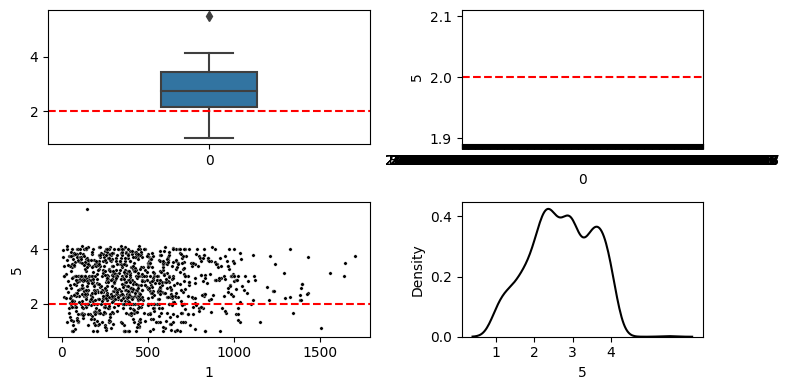

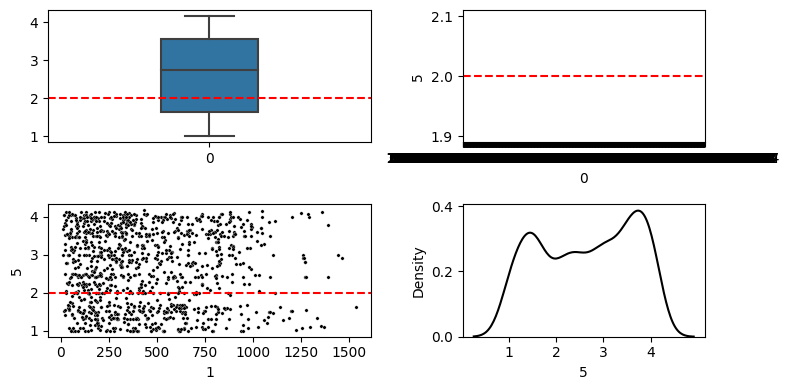

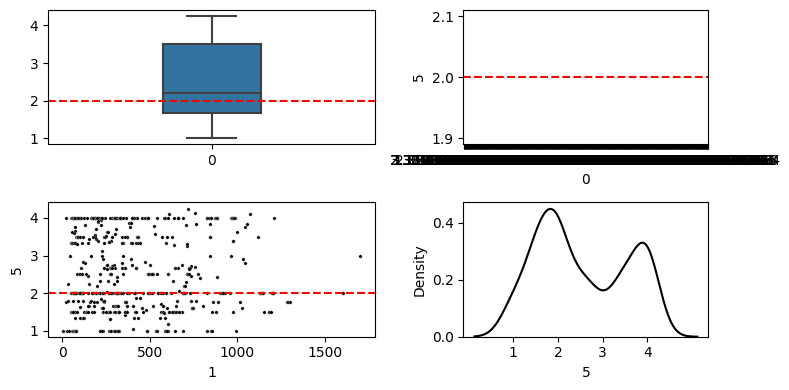

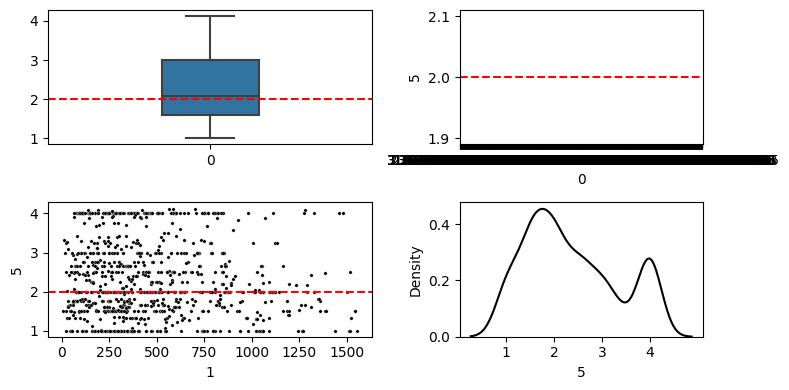

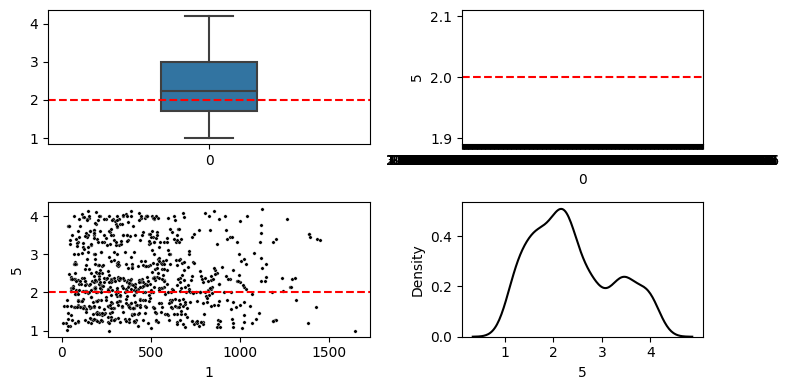

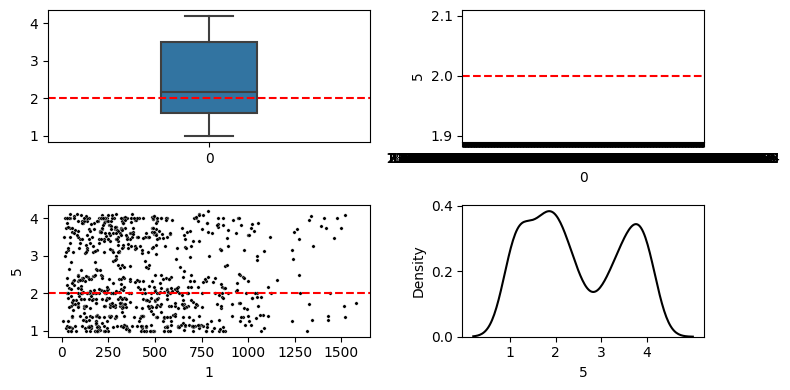

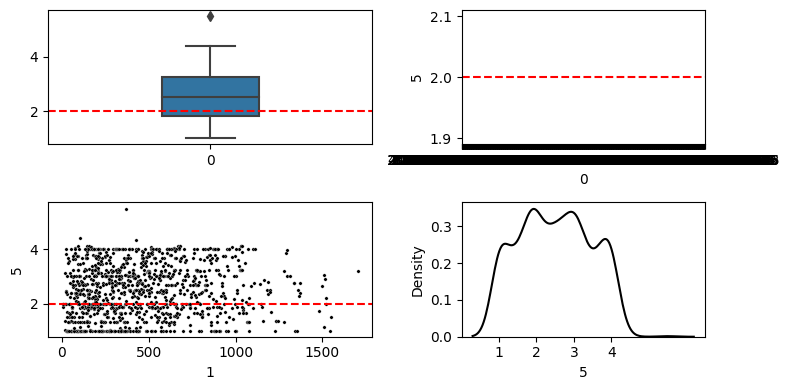

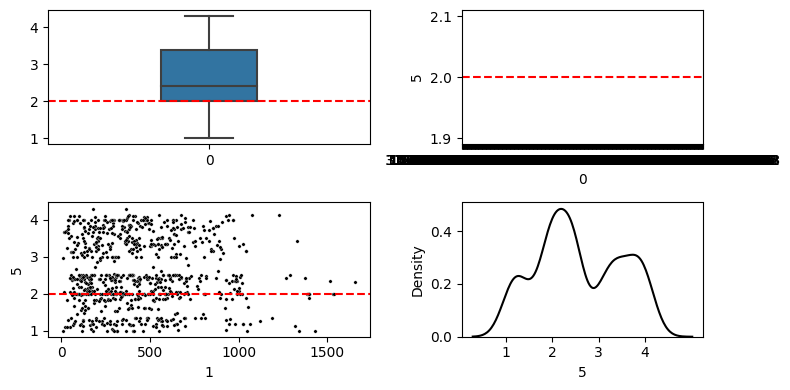

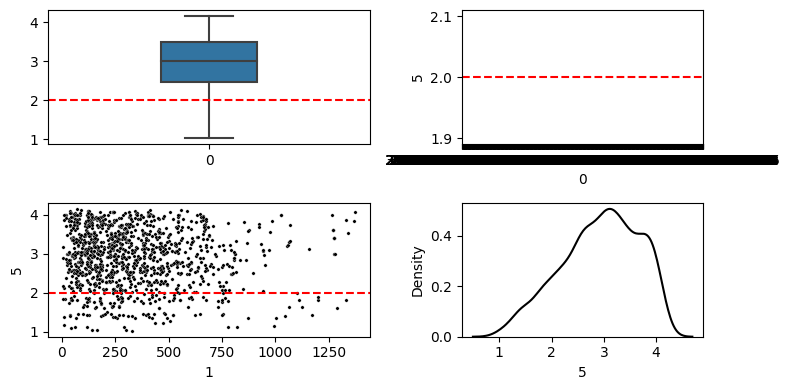

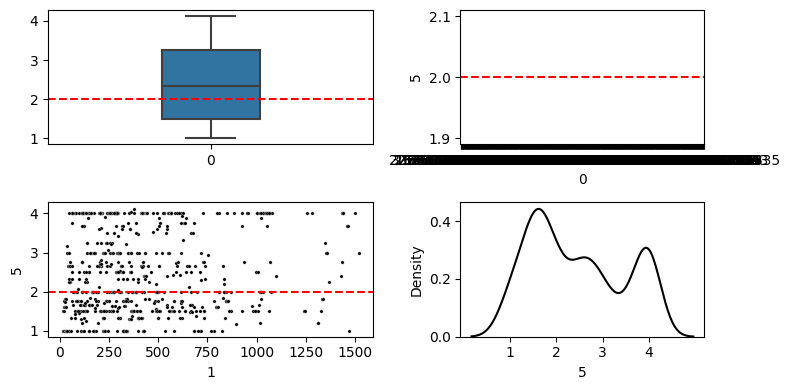

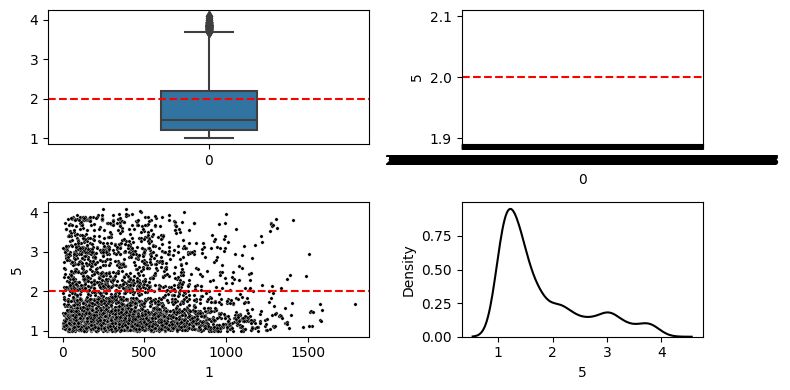

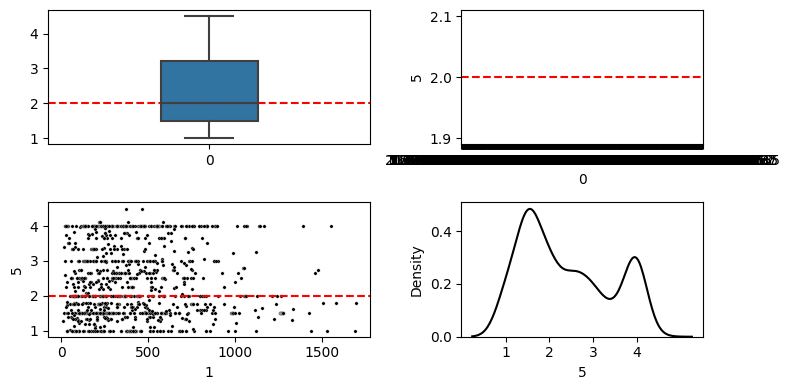

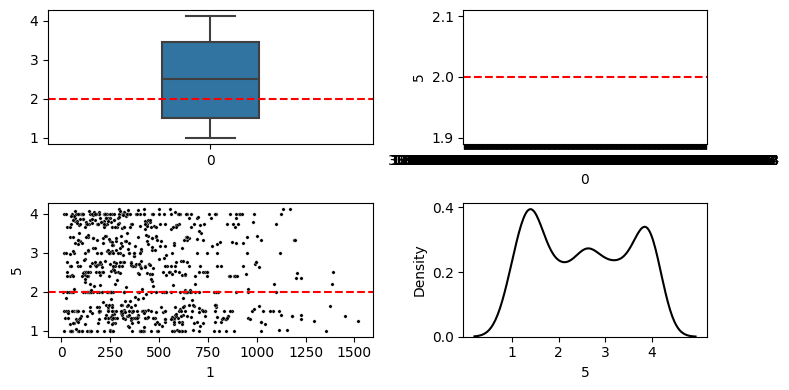

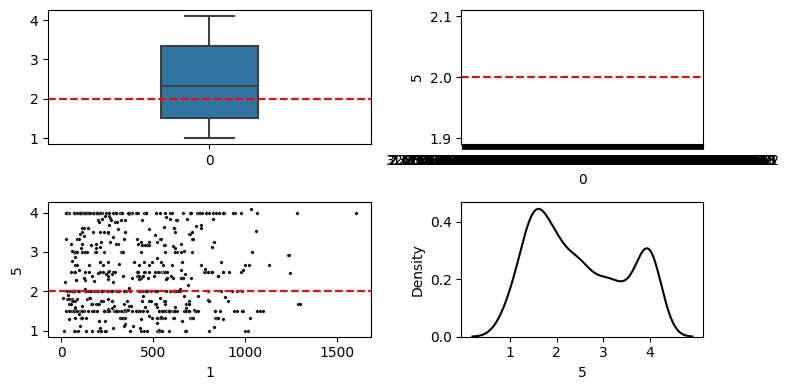

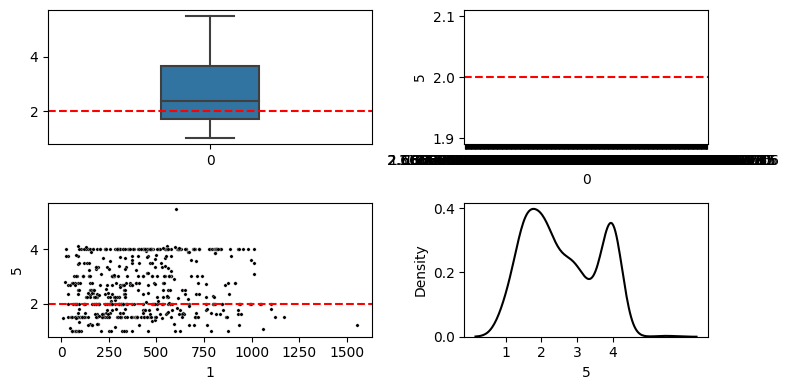

In [183]:
path = "./*.csv"

for file in glob.glob(path):
  SampleID = pd.read_csv(f'{file}', header=None, sep='\t')
  SampleID = pd.DataFrame(SampleID)
  SampleID[0] = SampleID[0].astype(str)
  SampleID[5] = SampleID[4]/SampleID[3]
  sum1 = len(SampleID[SampleID[5] < 2])
  sum2 = len(SampleID[SampleID[5] >= 2])
  sum3 = sum1 + sum2
  diploidSNPs = sum1*100/sum3
  median_v6 = SampleID[5].median()
  mean_v6 = SampleID[5].mean()
  #print(f'{file} {diploidSNPs} with mean={mean_v6} and median={median_v6}')
  
  f, axs = plt.subplots(2, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
  plt.subplot(2,2,1)
  sns.boxplot(SampleID[5],width=0.3)
  plt.axhline(y=2, linestyle='--', color='red')

  plt.subplot(2,2,2)
  sns.boxplot(x=0, y=5, data=SampleID, width=0.3, order=SampleID[5])
  plt.axhline(y=2, linestyle='--', color='red')
  

  plt.subplot(2,2,3)
  sns.scatterplot(x=1, y=5, data=SampleID, color='black',s=6)
  plt.axhline(y=2, linestyle='--', color='red')
  
  
  x = [1,2,3,4]
  plt.subplot(2,2,4)
  sns.kdeplot(SampleID[5], color='black') 
  plt.xticks(x)
  
  f.tight_layout()

In [184]:
  
  SampleID = pd.read_csv('JP0056_denoised.csv', header=None, sep='\t')
  SampleID = pd.DataFrame(SampleID)
  SampleID[0] = SampleID[0].astype(str)
  SampleID[5] = SampleID[4]/SampleID[3]

  f, axs = plt.subplots(2, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[3, 5]))
  plt.subplot(2,2,1)
  sns.boxplot(SampleID[5],width=0.3)
  plt.axhline(y=2, linestyle='--', color='red')

  plt.subplot(2,2,2)
  grouped = SampleID.groupby([0])

  df2 = pd.DataFrame({col:vals[5] for col,vals in grouped})

  meds = df2.median()
  meds.sort_values(inplace=True)
  df2 = df2[meds.index]


  sns.boxplot(data=df2)
  plt.xticks(rotation=45)
  sns.stripplot(data=df2, size=3, color='g')
  

  plt.subplot(2,2,3)
  sns.scatterplot(x=1, y=5, data=SampleID, color='black',s=6)
  plt.axhline(y=2, linestyle='--', color='red')
  
  
  x = [1,2,3,4]
  plt.subplot(2,2,4)
  sns.kdeplot(SampleID[5], color='black') 
  plt.xticks(x)
  plt.axvline(x=1, linestyle='dotted', color='red')
  plt.axvline(x=2, linestyle='dotted', color='red')
  plt.axvline(x=3, linestyle='dotted', color='red')
  plt.axvline(x=4, linestyle='dotted', color='red')

  f.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: 'JP0056_denoised.csv'

/tmp/ipykernel_1019849/3281084704.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df2 = pd.DataFrame({col:vals[5] for col,vals in grouped})
/home/polsince97/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:g'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: >

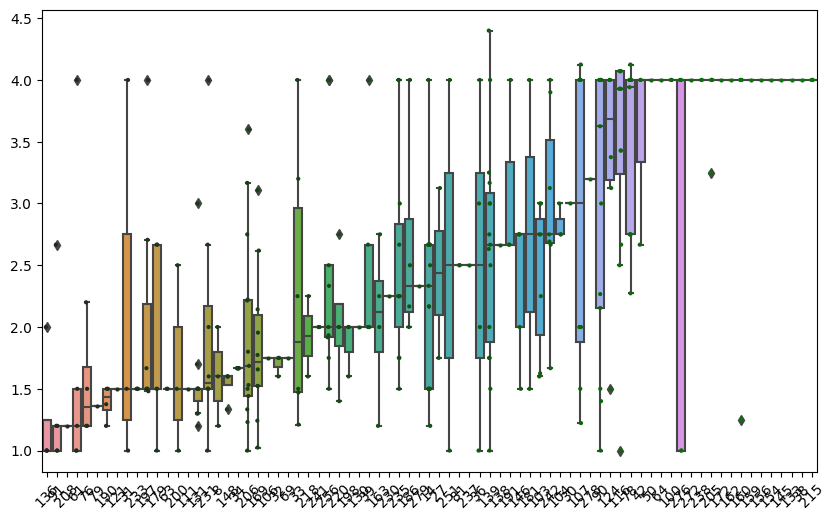

In [173]:
plt.figure(figsize=(10,6))
grouped = SampleID.groupby([0])

df2 = pd.DataFrame({col:vals[5] for col,vals in grouped})

meds = df2.median()
meds.sort_values(inplace=True)
df2 = df2[meds.index]


g=sns.boxplot(data=df2)
plt.xticks(rotation=45)
sns.stripplot(data=df2, size=3, color='g')






/tmp/ipykernel_1019849/867706890.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df2 = pd.DataFrame({col:vals[5] for col,vals in grouped})


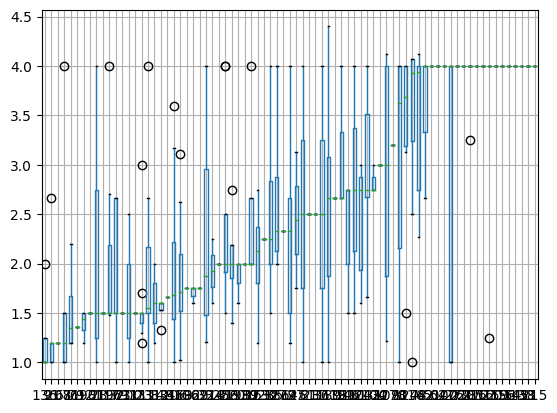

In [166]:

grouped = SampleID.groupby([0])

df2 = pd.DataFrame({col:vals[5] for col,vals in grouped})

meds = df2.median()
meds.sort_values(inplace=True)
df2 = df2[meds.index]
df2.boxplot()

plt.show()

In [131]:
no_uniques.apply(pd.Series.nunique)

0     77
1    275
2     54
3     31
4     52
5     67
dtype: int64